# Assignment Weather Linear Regression
### Submitted by Valentinus Mitchell Rahina Surya

The data are taken from the United States National Oceanic and Atmospheric Administration 
National Centres for Environmental Information website: https://www.ncdc.noaa.gov/data-access/land-based-station-data/land-based-datasets/world-war-ii-era-data

I am doing a regression analysis to find out is there a relationship between daily minimum and maximum temperature

## Attribute Information

Features consist of:
- Weather Station (STA)
- Self-explanatory (Date)
- Precipitation in mm (Precip)
- Peak wind gust speed in km/h (WindGustSpd)
- Maximum temperature in degrees Celsius (MaxTemp)
- Minimum temperature in degrees Celsius (MinTemp)
- Mean temperature in degrees Celsius (MeanTemp)
- Snowfall and Ice Pellets in mm (Snowfall)
- A repeat of the TSHDSBRSGF column (PoorWeather)
- Year of Observation (YR)

The dataset contains information on weather conditions recorded on each day at various weather stations around the world. Information includes precipitation, snowfall, temperatures, wind speed and whether the day included thunder storms or other poor weather conditions

## Loading Essential Libraries

In [277]:
# Importing ML Libraries
from sklearn.linear_model import LinearRegression  # Import Linear regression
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.metrics import confusion_matrix #Import scikit-learn metrics module for accuracy calculation

import pydotplus
import pandas as pd # data processing, CSV file
import numpy as np # linear algebra
import seaborn as sns # visualization library
import matplotlib.pyplot as plt # visualization library

from scipy.stats import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm

import warnings # import warnings library
warnings.filterwarnings("ignore") # if there is a warning after some codes, this will avoid me to see them.

In [278]:
# Display all the columns
pd.set_option('display.max_columns',None)

In [279]:
# Loading the dataset
weather = pd.read_csv('Weather/SummaryWeather.csv')
weather.head()
# Independent Variable (x) is MinTemp and dependent variable (y) is MaxTemp
# Because I only need MinTemp and Maxtemp for independent and dependent variable, I do not need to data cleaning part hehehe

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,MO,DA,PRCP,DR,SPD,MAX,MIN,MEA,SNF,SND,FT,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,7,1,0.04,NaN,NaN,78.0,72.0,75.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,7,2,0,NaN,NaN,84.0,71.0,78.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,7,3,0.1,NaN,NaN,79.0,72.0,76.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,7,4,0.1,NaN,NaN,80.0,72.0,76.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,7,5,0,NaN,NaN,80.0,71.0,76.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [280]:
weather.columns 
# Independent Variable (x) is MinTemp and dependent variable (y) is MaxTemp

Index(['STA', 'Date', 'Precip', 'WindGustSpd', 'MaxTemp', 'MinTemp',
       'MeanTemp', 'Snowfall', 'PoorWeather', 'YR', 'MO', 'DA', 'PRCP', 'DR',
       'SPD', 'MAX', 'MIN', 'MEA', 'SNF', 'SND', 'FT', 'FB', 'FTI', 'ITH',
       'PGT', 'TSHDSBRSGF', 'SD3', 'RHX', 'RHN', 'RVG', 'WTE'],
      dtype='object')

In [281]:
#Identifying the Null values 
weather.isnull().sum()

STA                 0
Date                0
Precip              0
WindGustSpd    118508
MaxTemp             0
MinTemp             0
MeanTemp            0
Snowfall         1163
PoorWeather     84803
YR                  0
MO                  0
DA                  0
PRCP             1932
DR             118507
SPD            118508
MAX               474
MIN               468
MEA               498
SNF              1163
SND            113477
FT             119040
FB             119040
FTI            119040
ITH            119040
PGT            118515
TSHDSBRSGF      84803
SD3            119040
RHX            119040
RHN            119040
RVG            119040
WTE            119040
dtype: int64

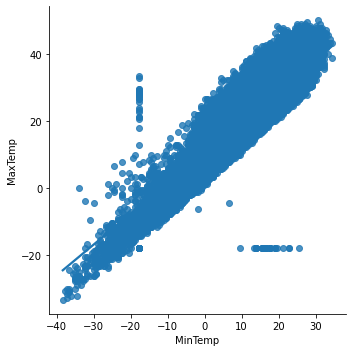

In [282]:
# Visualizing the Linear Regregression Line
sns.lmplot(x='MinTemp',y='MaxTemp',data=weather)
plt.show()
# Here x is MinTemp and y is MaxTemp

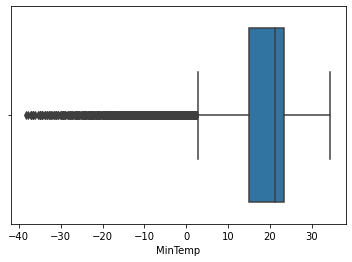

In [283]:
# Creating a boxplot of the independent variable and target variable
sns.boxplot(weather['MinTemp'])
plt.show()

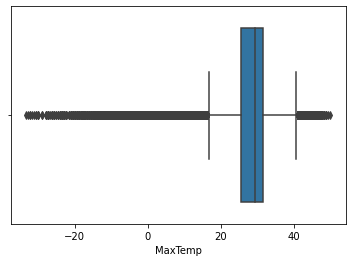

In [284]:
sns.boxplot(weather['MaxTemp'])
plt.show()

## Correlation of Columns

<AxesSubplot:>

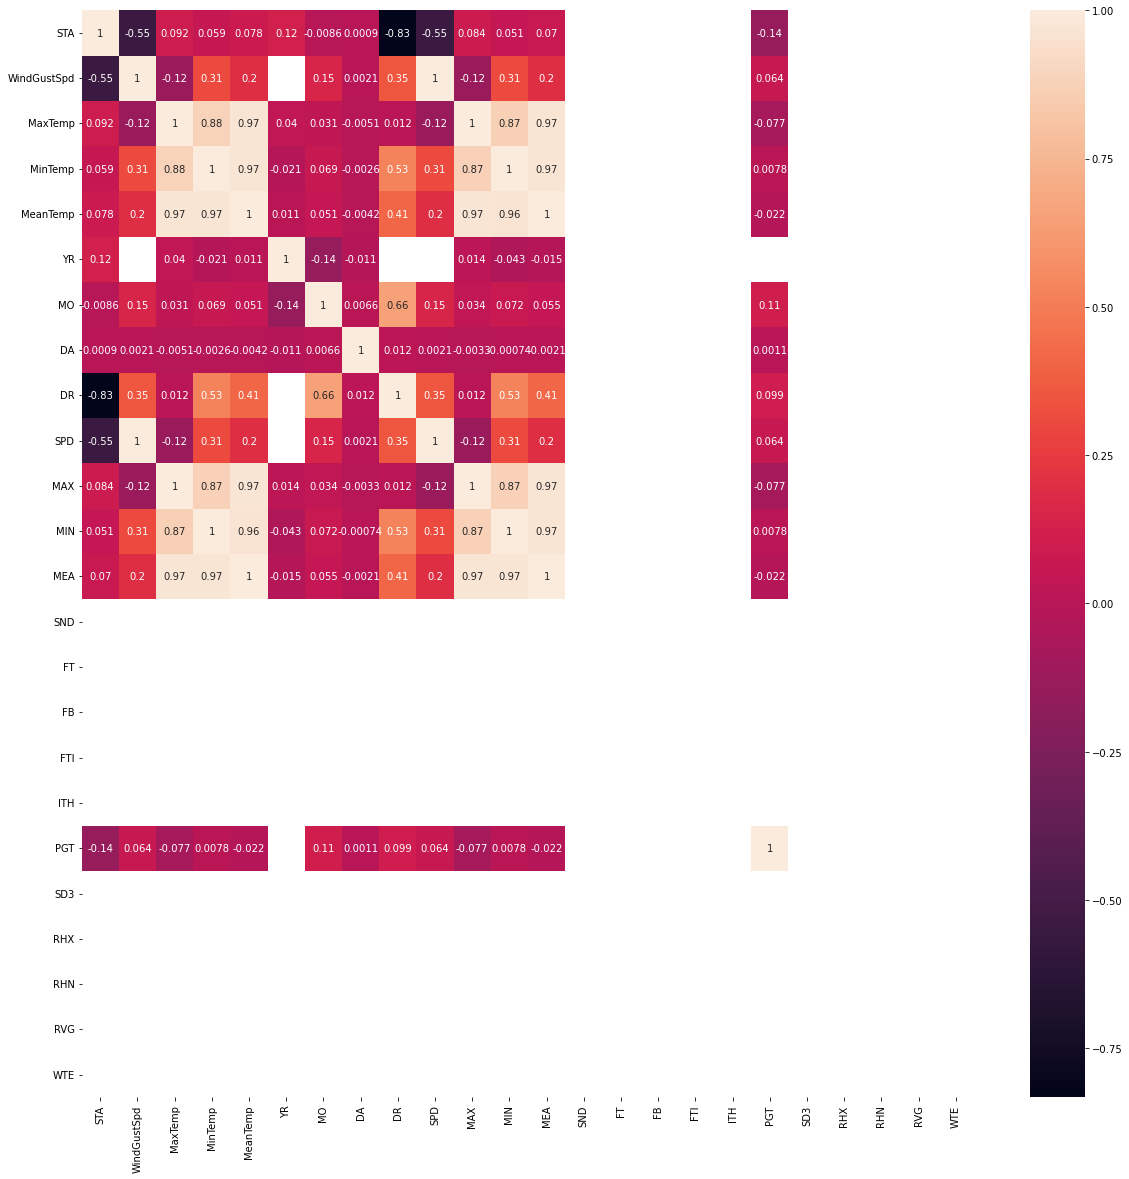

In [285]:
# Check the correlation of independent variable and target variable
plt.figure(figsize=(20,20))
sns.heatmap(weather.corr(), annot=True)
# There are many columns which are not correlated which each other. So I will only check the correlation of independent variable and target variable.

In [286]:
weather['MinTemp'].corr(weather['MaxTemp'])
# The output give me highly correlated so I can applied it

0.8783839059497572

## Splitting The Variables into Train and Test Set

In [287]:
# The test_size = 0.30 means I am going to train the model using 70% of the data 
# and after building the model by using the remaining 30% we will test this.
xtrain,xtest,ytrain,ytest = train_test_split(weather[['MinTemp']],weather[['MaxTemp']],
                                             test_size = 0.30,
                                            random_state = 123)

In [288]:
xtrain.size

83328

In [289]:
xtest.size

35712

## Creating Regression

In [290]:
#To build the Linear Regression model we can use the scikit learn LinearRegression function.
lr = LinearRegression()

In [291]:
# Fitting the training sets into the object
lr.fit(xtrain, ytrain)

LinearRegression()

In [304]:
# Predicting the test set based on training set
ypred = lr.predict(xtest)
ypred

array([[14.7953037 ],
       [30.09840852],
       [19.38623515],
       ...,
       [-3.5684221 ],
       [30.09840852],
       [29.07820154]])

In [307]:
#Here we are going to check how much the predicted value is deviated from the actual value using a value from the given data set
print("Temperature Row:\n")
print(weather.loc[0])

Temperature Row:

STA                10001
Date            1942-7-1
Precip             1.016
WindGustSpd          NaN
MaxTemp        25.555556
MinTemp        22.222222
MeanTemp       23.888889
Snowfall             0.0
PoorWeather          NaN
YR                    42
MO                     7
DA                     1
PRCP                0.04
DR                   NaN
SPD                  NaN
MAX                 78.0
MIN                 72.0
MEA                 75.0
SNF                  0.0
SND                  NaN
FT                   NaN
FB                   NaN
FTI                  NaN
ITH                  NaN
PGT                  NaN
TSHDSBRSGF           NaN
SD3                  NaN
RHX                  NaN
RHN                  NaN
RVG                  NaN
WTE                  NaN
Name: 0, dtype: object


InvalidIndexError: (slice(None, None, None), None)

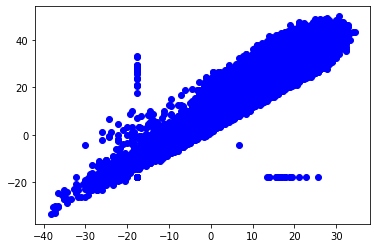

In [308]:
# Visualizing the training set with the Linear Regression line
plt.scatter(xtrain,ytrain, color='blue')
plt.plot(xtrain,lr.predict(xtrain))
plt.xlabel('Minimum Temperature')
plt.ylabel('Maximum Temperature')
plt.title('Minimum Vs Maximum Temperature')
plt.show()

Text(0.5, 1.0, 'Minimum Vs Maximum Temperature')

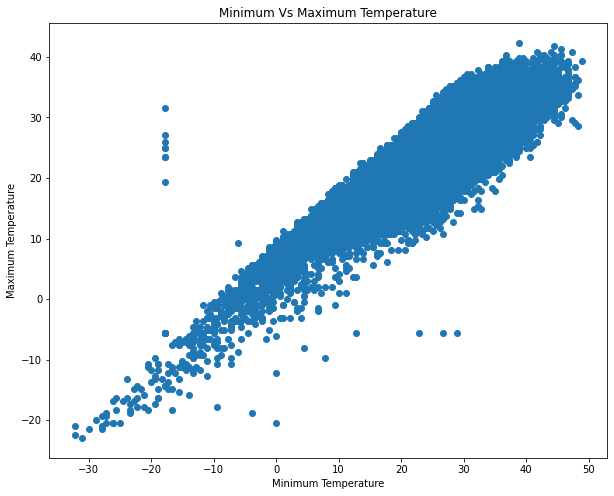

In [313]:
# Visualizing the test set with the Linear Regression line
plt.figure(figsize=(10,8))
plt.scatter(ytest,ypred)
plt.xlabel('Minimum Temperature')
plt.ylabel('Maximum Temperature')
plt.title('Minimum Vs Maximum Temperature')

In [306]:
from sklearn.metrics import r2_score, mean_squared_error
#In order to further evaluate how accurate model is and how accurate predicted values are lets evaluate the model 
#using r2 score
r2_score(ytest,ypred)
# The accuracy of the model is 77%

0.7733396374328009

In [276]:
np.sqrt(mean_squared_error(ytest,ypred)) 

4.134436592076651

#### Conclusion - The above value represents that predicted temperature is 4.13 degrees away from the actual temperature.